# Fake Jobs Posting Prediction

## **Data Exploration**

In [1]:
## import all the necessary libraries
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")                   

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##reading dataset
df = pd.read_csv('./DataSets/fake_job_postings.csv')

print(df.shape)
df.head()

(17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df.columns # printing what are all the columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [4]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

## **Data Visualization**

<AxesSubplot:>

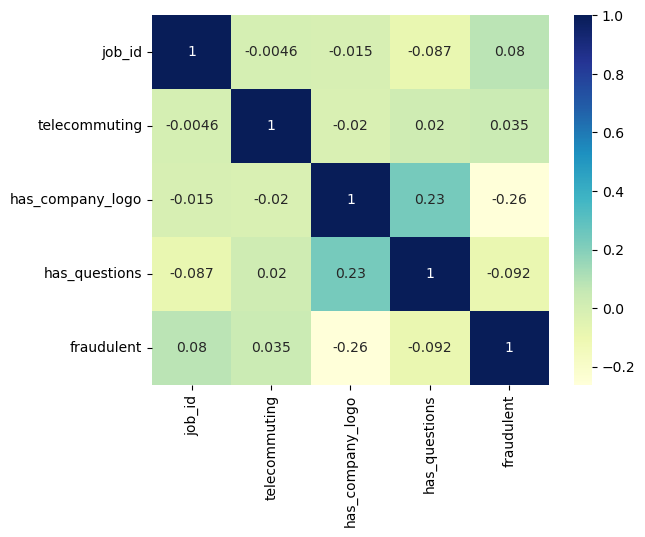

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap = 'YlGnBu')

## **Data Preparation**

In [6]:
# drop unnecessary columns 
data=df.drop(['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits'],axis=1)

In [7]:
data

,job_id,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...
17875,17876,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [8]:
dm=pd.get_dummies(data[["employment_type", "required_experience", "required_education", "industry", "function"]],drop_first=True)
data=pd.concat([data,dm],axis=1)

In [9]:
data

,job_id,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,...,function_Public Relations,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing
0,1,0,1,0,Other,Internship,NaN,NaN,Marketing,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,...,0,0,0,0,1,0,0,0,0,0
17876,17877,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,...,0,0,0,0,0,0,0,0,0,0
17877,17878,0,0,0,Full-time,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
17878,17879,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data=data.drop(["employment_type", "required_experience", "required_education", "industry", "function"],axis=1)

In [11]:
data

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Director,...,function_Public Relations,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17876,17877,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17877,17878,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17878,17879,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Data Prep**

In [12]:
# splitting the data
X=data.drop(['fraudulent'],axis=1)
Y=data['fraudulent']

# Now we need to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

# **Model Creation**

## **1. Random Forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier
reg1=RandomForestClassifier()
reg1.fit(X_train,y_train)
pred1=reg1.predict(X_test)
print("Accuracy of the RandomForest model comes to be: \n ") 
print(reg1.score(X_train,y_train))

Accuracy of the RandomForest model comes to be: 
 
0.9999300894854586


## **2. Linear Tree Regressor**

In [14]:
# Importing linear regression model
from sklearn.linear_model import LinearRegression 
reg2 = LinearRegression()
#Fitting data into the model.
reg2.fit(X_train, y_train)
# Making predictions on Test data 
pred2 = reg2.predict(X_test)
print("Accuracy of the Decision Tree Regressor  model comes to be: \n ") 
print(reg2.score(X_train,y_train))

Accuracy of the Decision Tree Regressor  model comes to be: 
 
0.18518010183397138


## **3. Ridge Regression**

In [15]:
# Importing model
from sklearn.linear_model import Ridge
reg3 = Ridge()

# Fitting data into the model.
reg3.fit(X_train, y_train)
# Making predictions 
pred3 = reg3.predict(X_test)
print("Accuracy of the LassoRegression model comes to be: \n ") 
print(reg3.score(X_train,y_train))

Accuracy of the LassoRegression model comes to be: 
 
0.18442919502223576


## **4. K Neighbors Classifier**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
reg4=KNeighborsClassifier(n_neighbors=30)

reg4.fit(X_train,y_train)
pred4=reg4.predict(X_test)

print("Accuracy of the K Neighbors Classifier model comes to be: \n ") 
print(reg4.score(X_train,y_train))

Accuracy of the K Neighbors Classifier model comes to be: 
 
0.9681208053691275


## **Performance Evaluation**

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t RootMeanSquareError \t\t Accuracy of the model") 
print("""Random   Forest \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred1)), reg1.score(X_train,y_train)))
print("""Linear Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred2)), reg2.score(X_train,y_train)))
print("""Ridge Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred3)), reg3.score(X_train,y_train)))
print("""K Neighbors Classifier\t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred4)), reg4.score(X_train,y_train)))


Model			 RootMeanSquareError 		 Accuracy of the model
Random   Forest 		 0.1348 	 		 0.9999
Linear Regression 		 0.1862 	 		 0.1852
Ridge Regression 		 0.1856 	 		 0.1844
K Neighbors Classifier		 0.1595 	 		 0.9681


Conclusion: Accuracy of Regression models- Linear regression, rigde regression is almost same.

Whereas accuracy of Random Forest is higher and root mean square error is least.

Random Forest is more efficient model.